# LAX, What do you want to know?


This project is originally from my curiosity. While travelling to LAX, these questions came to my mind.

- Where do the flights landed in LAX depart from? How many flights?
- Predict delay?
- What is the busiest time?

I was trying to search them up, but, unfortunately, Google didn't satisfy my curioisty. (You can try!). Well, let answer them by myself then!!


### What to expect?

- Fun! Fulfil your curiosity

### What not to expect?

- Cutting-edge technology or novel approach, nah, not at all. Just simple tools that everyone knows.




In [1]:
from scrape import daily, sort_flight_by_time
import json
import pandas as pd
import requests

## Where to get data?

First of all, there are many websites that provide realtime fligts information in LAX. I decided to use [this]( https://www.airport-la.com/lax/arrivals). As you can see, its structure is very simple, mostly HTML. Easy to scrape, huh?

Run this code daily

Alternatively

1. https://www.pythonanywhere.com/ (free)
2. AWS Free Tier

In [2]:
# daily()

with open("database.json", "r") as f:
    db = json.load(f)


Then what next? The table from [Airport-LA website](https://www.airport-la.com/lax/arrivals) has IATA code, which is .... Maybe we need something that make more sense for normal people, like where exacyly they are? Also [Airport-LA website](https://www.airport-la.com/lax/arrivals)  tells you the city where flights are from but not country. Do you know where on earth is Puerto Vallarta?? I don't know and I don't want wasting time search it up everytime. Let's make some tools to visualize!!


1. IATA Airport Code from  https://datahub.io/core/airport-codes
2. Country Code from https://datahub.io/core/country-list


In [3]:
airport_locations_response = requests.get("https://datahub.io/core/airport-codes/r/airport-codes.json")
if airport_locations_response.status_code == 200:
    airport_locations = {e["iata_code"]: {
        "display_name": e["name"],
        "lat": e["coordinates"].split(",")[0],
        "lon": e["coordinates"].split(",")[1],
        "country": e["iso_country"]
    } for e in airport_locations_response.json() if e["iata_code"] is not None}
else:
    print("unable to download IATA Data")

country_code_response = requests.get("https://datahub.io/core/country-list/r/data.json")
if country_code_response.status_code == 200:
    country_code = {e["Code"]: e["Name"] for e in country_code_response.json()}
else:
    print("unable to download Country Data")


In [4]:
df = sort_flight_by_time(db, airport_locations, country_code)

Let's see what is our data looks like!

In [5]:
df.head()

,dt_scheduled,dt_actual,flight,gate,airport,city,country,lat,long,display name
619,2020-02-19 00:03:00,2020-02-19 23:53:00,AA772,5 53B,PHL,Philadelphia,United States,-75.24109649658203,39.87189865112305,Philadelphia International Airport
620,2020-02-19 00:09:00,2020-02-19 23:40:00,AA300,4 42B,JFK,New York,United States,-73.77890015,40.63980103,John F Kennedy International Airport
634,2020-02-19 00:20:00,2020-02-19 06:51:00,CZ473,,ANC,Anchorage,United States,-149.99600219726562,61.174400329589844,Ted Stevens Anchorage International Airport
621,2020-02-19 00:25:00,2020-02-19 23:57:00,UA257,7 71A,SFO,San Francisco,United States,-122.375,37.61899948120117,San Francisco International Airport
622,2020-02-19 00:28:00,2020-02-19 00:23:00,AA1061,4 48A,MIA,Miami,United States,-80.29060363769531,25.79319953918457,Miami International Airport


### What is the busiest time?

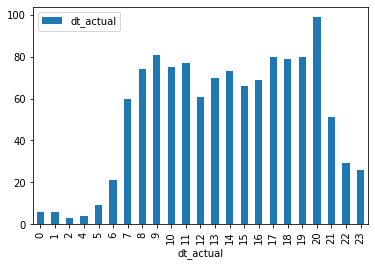

In [6]:
df[["dt_actual"]].groupby(df["dt_actual"].dt.hour).count().plot(kind="bar")

### What City?

In [7]:
df[["flight", "city", "country"]].groupby(["country", "city"]).count().sort_values(["flight"], ascending=False).head(20)

flight
country       city                  
United States San Francisco       71
              Las Vegas           65
              New York            62
              Chicago             44
              Seattle             40
              Denver              38
              Dallas              37
              Phoenix             34
              Houston             31
              Atlanta             31
              San Jose            30
              Austin              25
              Oakland             24
              Salt Lake City      24
              Portland            23
              Boston              22
              Newark              21
              Honolulu            20
              Washington          20
              Sacramento          19

In [8]:
df[["flight",  "country"]].groupby(["country"]).count().sort_values(["flight"], ascending=False).head()

,flight
country,
United States,996
Mexico,43
Canada,38
Japan,15
United Kingdom,15
